# Project 4
Load Dataframe and name Headers

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sl
%matplotlib inline


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                 names = ['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                         'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
                         'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

Select Desired Series and format

In [139]:
result = df[['classes', 'odor', 'habitat']]

In [140]:
result['classes'] = result['classes'].replace(['e', 'p'], [0, 1])
result['odor'] = result['odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], [0, 1, 2, 3, 4, 5, 6, 7, 8])
result['habitat'] = result['habitat'].replace(['g', 'l', 'm', 'p', 'u', 'w', 'd'], [0, 1, 2, 3, 4, 5, 6])
result.head()

C:\Users\kou_o\AppData\Local\Temp\ipykernel_8140\1422912716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['classes'] = result['classes'].replace(['e', 'p'], [0, 1])
C:\Users\kou_o\AppData\Local\Temp\ipykernel_8140\1422912716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['odor'] = result['odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], [0, 1, 2, 3, 4, 5, 6, 7, 8])
C:\Users\kou_o\AppData\Local\Temp\ipykernel_8140\1422912716.py:3: SettingWithCopyWarning: 
A value is tryi

,classes,odor,habitat
0,1,7,4
1,0,0,0
2,0,1,2
3,1,7,4
4,0,6,0


Setup Test on KNN and define parameters. X for fun can compare based on both parameters.

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [144]:
X = result[['odor', 'habitat']]
X1 = result[['odor']]
X2 = result[['habitat']]
y = result['classes']

Compare accuracy scores of Odor and Habitat

In [147]:
from sklearn import metrics

knn.fit(X1, y)
y_pred = knn.predict(X1)
metrics.accuracy_score(y, y_pred)

0.9852289512555391

In [148]:
knn.fit(X2, y)
y1_pred = knn.predict(X2)
metrics.accuracy_score(y, y1_pred)

0.5007385524372231

Confirmation that Odor is a better indicator than Habitat

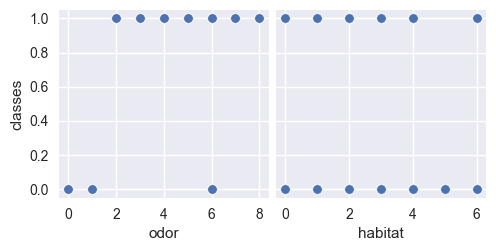

In [149]:
sns.pairplot(result, x_vars=['odor', 'habitat'], y_vars='classes')